### Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.



-> K-Means Clustering

- Approach: K-Means is a partitioning clustering algorithm. It aims to partition n observations into k clusters, where each observation belongs to the cluster with the nearest mean (centroid), serving as a prototype of the cluster.
- Process:

1. Initialize k centroids randomly.
2. Assign each data point to its closest centroid.
3. Recalculate the centroids based on the mean of the points in each cluster.
4. Repeat steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.

- Key Characteristics:

1. Requires the number of clusters (k) to be specified beforehand.
2. Clusters are typically spherical and of similar size.
3. Sensitive to initial centroid placement.
4. Computationally efficient for large datasets.

- Use Case: Customer segmentation for marketing. A company might want to group its customers into k distinct segments (e.g., 'high-value', 'occasional shopper', 'new customer') based on purchasing behavior to tailor marketing strategies. K-Means is suitable here because the business often has a predefined idea of how many segments they need, and the algorithm is efficient for large customer databases.

- Hierarchical Clustering

- Approach: Hierarchical clustering is a connectivity-based clustering algorithm. It builds a hierarchy of clusters, either by starting with individual data points and merging them into clusters (agglomerative) or by starting with one large cluster and recursively dividing it (divisive).

- Process (Agglomerative, most common):
1. Start with each data point as a single cluster.
2. Repeatedly merge the two closest clusters based on a distance metric and linkage criterion (e.g., 'single', 'complete', 'average' linkage).
3. Continue merging until all points belong to a single cluster, forming a dendrogram.

- Key Characteristics:

- Does not require specifying the number of clusters beforehand. The number of clusters can be determined by cutting the dendrogram at a certain level.
- Can produce clusters of varying shapes and sizes.
- Provides a visual representation of the clustering process (dendrogram).
- Computationally more intensive than K-Means for very large datasets.

- Use Case: Biological taxonomy or phylogenetic tree construction. Researchers might use hierarchical clustering to group species or genes based on genetic similarities, where the exact number of groups isn't known in advance, and the relationships between groups (e.g., how closely related species are) are important to visualize and understand. The dendrogram provides a clear picture of these relationships.

### Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.


-> The Silhouette Score is a metric used to evaluate the quality of clustering results. It provides a way to assess how well individual data points are clustered and how well the clusters are separated from each other.

Here's a breakdown of its purpose:

- Measuring Cluster Cohesion and Separation: For each data point, the Silhouette Score considers two factors:

  Cohesion (a): The average distance between a data point and all other points in the same cluster. A small 'a' value indicates that the data point is well-matched to its own cluster.

  
  Separation (b): The average distance between a data point and all points in the nearest neighboring cluster. A large 'b' value indicates that the data point is well-separated from other clusters.

- Calculation: The Silhouette Score for a single data point is calculated as: (b - a) / max(a, b).

- Interpreting the Score: The score ranges from -1 to +1:

1. +1: Indicates that the data point is very far from neighboring clusters and well-clustered with its own cluster (optimal).
2. 0: Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
3. -1: Indicates that the data point might have been assigned to the wrong cluster.
- Overall Evaluation: The average Silhouette Score across all data points gives an overall measure of the clustering quality. A higher average Silhouette Score generally indicates better-defined and more separated clusters.

Purpose and Benefits:

- Determining Optimal Number of Clusters (k): When using algorithms like K-Means that require pre-defining the number of clusters, the Silhouette Score can help in choosing the optimal k. You can run the clustering for different k values and select the k that yields the highest average Silhouette Score.
- Comparing Different Clustering Algorithms: It can be used to compare the performance of different clustering algorithms on the same dataset.
- Identifying Poorly Clustered Points: By looking at individual Silhouette Scores, you can identify points that are outliers or that might be misclassified.

### Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?


-> DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. Its core parameters are eps (epsilon) and MinPts (minimum points), and they significantly influence the clustering process:

eps (epsilon):

Definition:

This parameter defines the maximum radius of the neighborhood around a point. It's the maximum distance between two samples for one to be considered as in the neighborhood of the other.

Influence:

- Larger eps: A larger eps value means that points can be further apart and still be considered neighbors. This can lead to larger clusters, and potentially fewer clusters overall, as more points will fall within the neighborhood of core points. It might also merge clusters that would otherwise be distinct.
- Smaller eps: A smaller eps value means that points must be very close to each other to be considered neighbors. This will result in smaller, more compact clusters and can lead to more points being classified as noise (outliers) if they don't have enough neighbors within that tighter radius.

MinPts (minimum points):

Definition:

This parameter defines the minimum number of data points required to form a dense region (a cluster). It includes the point itself.
Influence:

- Larger MinPts: A larger MinPts value makes the requirement for a dense region stricter. This means only truly dense areas will form clusters, leading to fewer clusters and more points being labeled as noise. It's good for filtering out smaller, less significant clusters.
- Smaller MinPts: A smaller MinPts value makes it easier for points to be considered core points, and thus, easier to form clusters. This can lead to more clusters, including potentially noisy or less significant ones, and fewer points being labeled as noise.

How they work together:

- A point p is a core point if at least MinPts points are within distance eps of it (including p itself).
- A point q is directly density-reachable from a core point p if q is within distance eps from p.
- A point q is density-reachable from p if there is a path of directly density-reachable points from p to q.
- A point n is noise if it is not a core point and not density-reachable from any core point.


Optimally selecting eps and MinPts is crucial for DBSCAN's performance. Often, MinPts is chosen based on the dimensionality of the dataset (e.g., typically MinPts >= 2 * dimensionality), and eps is determined using a k-distance graph (plotting the distance to the MinPts-th nearest neighbor for each point and looking for an 'elbow' point).

### Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?


-> Feature scaling is crucial when applying clustering algorithms like K-Means and DBSCAN for several important reasons:

1. Distance-Based Algorithms: Both K-Means and DBSCAN are distance-based algorithms. This means they rely heavily on calculating distances between data points (e.g., Euclidean distance) to determine cluster assignments and densities.

2. Impact of Feature Scales:

- Unequal Influence: If features have vastly different scales (e.g., one feature ranges from 0 to 1000, and another from 0 to 1), the feature with the larger scale will disproportionately influence the distance calculations. The algorithm will effectively give more weight to the feature with the larger range, regardless of its actual importance to the clustering structure.
- Skewed Clusters: This can lead to skewed or inaccurate clusters, where the clusters are primarily formed based on the dominant-scaled features rather than the underlying patterns across all features.
3. K-Means Specifics:

- Centroid Calculation: In K-Means, centroids are calculated as the mean of the data points within a cluster. If features are not scaled, features with larger values will contribute more to the centroid's position, pulling the centroid towards their direction and potentially misrepresenting the true center of the cluster.
- Convergence Speed: Unscaled data can also slow down the convergence of the K-Means algorithm.
4. DBSCAN Specifics:

- eps Parameter: For DBSCAN, the eps (epsilon) parameter defines the maximum radius for a neighborhood. If features are on different scales, choosing an appropriate eps becomes very difficult. An eps value that works for a small-scaled feature might be too small for a large-scaled feature, and vice-versa, leading to either merging unrelated clusters or classifying dense regions as noise.
- Density Definition: The concept of 'density' in DBSCAN is based on the number of points within a given eps radius. Uneven scaling distorts this density, making it challenging to correctly identify dense regions and classify core, border, and noise points.

Common Scaling Methods:

To address these issues, features are typically scaled to a similar range:

- Standardization (Z-score normalization): Transforms data to have a mean of 0 and a standard deviation of 1. It's good when features have a Gaussian distribution. x_scaled = (x - mean(x)) / std(x)
- Normalization (Min-Max scaling): Scales data to a fixed range, usually 0 to 1. It's often used when the data is not normally distributed or when algorithms require inputs within a specific range. x_scaled = (x - min(x)) / (max(x) - min(x)).

### Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?


The Elbow Method is a heuristic technique used to determine the optimal number of clusters (k) for a given dataset in K-Means clustering. It's based on the idea that as you increase the number of clusters, the within-cluster sum of squares (WCSS) will generally decrease. WCSS is a measure of the variability within each cluster, essentially how spread out the points are from their cluster centroid.

Here's how it works and how it helps determine the optimal number of clusters:

1. Calculate WCSS for a Range of K Values:

- You run the K-Means algorithm for a range of k values (e.g., from 1 to 10 or more).
- For each k, you calculate the WCSS. WCSS is the sum of the squared distances between each point and the centroid of the cluster it belongs to. A lower WCSS generally indicates better clustering, meaning the points within each cluster are closer to their respective centroids.
2. Plot the WCSS Values:

- You then plot the WCSS values on the y-axis against the number of clusters (k) on the x-axis.
3. Identify the 'Elbow':

- The plot will typically show a curve that decreases rapidly at first and then gradually flattens out, forming an 'elbow' shape.
- The 'elbow point' on this graph represents the k value where the rate of decrease in WCSS significantly changes. Before the elbow, adding more clusters considerably reduces the WCSS (meaning you are gaining a lot by adding more clusters). After the elbow, the decrease in WCSS becomes much smaller, implying that adding more clusters doesn't provide much additional benefit in terms of reducing within-cluster variance.
4. Optimal Number of Clusters:

- The k value at the 'elbow' is generally considered the optimal number of clusters.


Why it helps:

- Balance Between Cohesion and Complexity: The Elbow Method helps find a balance. You want to minimize WCSS (have tightly packed clusters), but you also don't want too many clusters, which can lead to overfitting or clusters with very few points. The elbow point suggests a k where you achieve a good level of cluster compactness without adding unnecessary complexity.
- Intuitive Visualization: The visual representation makes it relatively easy to interpret and identify a sensible number of clusters, especially for datasets where the true number of clusters isn't known beforehand.

### Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),apply KMeans clustering, and visualize the results with cluster centers.
(Include your Python code and output in the code box below.)


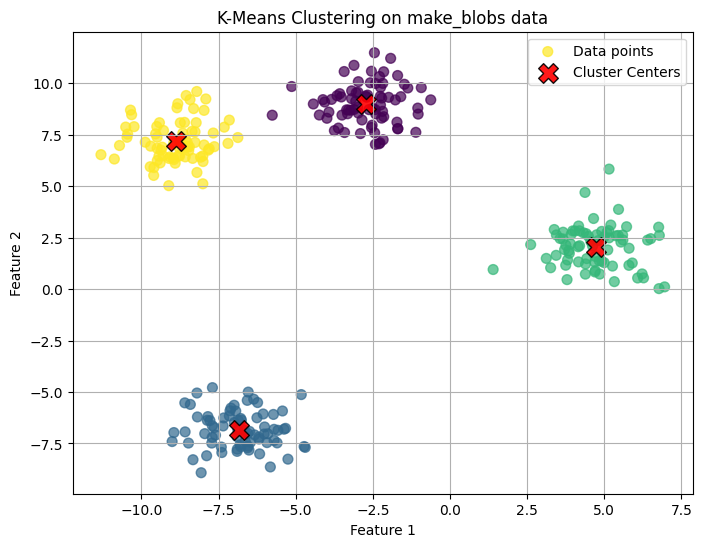

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# 2. Apply KMeans clustering
# We know there are 4 true centers, so we'll set n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7, label='Data points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', edgecolor='black', label='Cluster Centers')
plt.title('K-Means Clustering on make_blobs data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
(Include your Python code and output in the code box below.)

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X_wine = wine.data

# 2. Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# 3. Train a DBSCAN model
# Epsilon (eps) and MinPts are critical for DBSCAN.
# For demonstration, we'll pick some values.
# In a real scenario, these would be tuned.
dbsc = DBSCAN(eps=0.8, min_samples=5) # Example values
dbsc.fit(X_scaled)

# Get cluster labels
labels = dbsc.labels_

# 4. Print the number of clusters found (excluding noise)
# Noise points are labeled as -1 by DBSCAN
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters found (excluding noise): {n_clusters_}")
print(f"DBSCAN Labels: {labels}")

Number of clusters found (excluding noise): 0
DBSCAN Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


### Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
(Include your Python code and output in the code box below.)

Estimated number of clusters: 1
Estimated number of noise points: 0


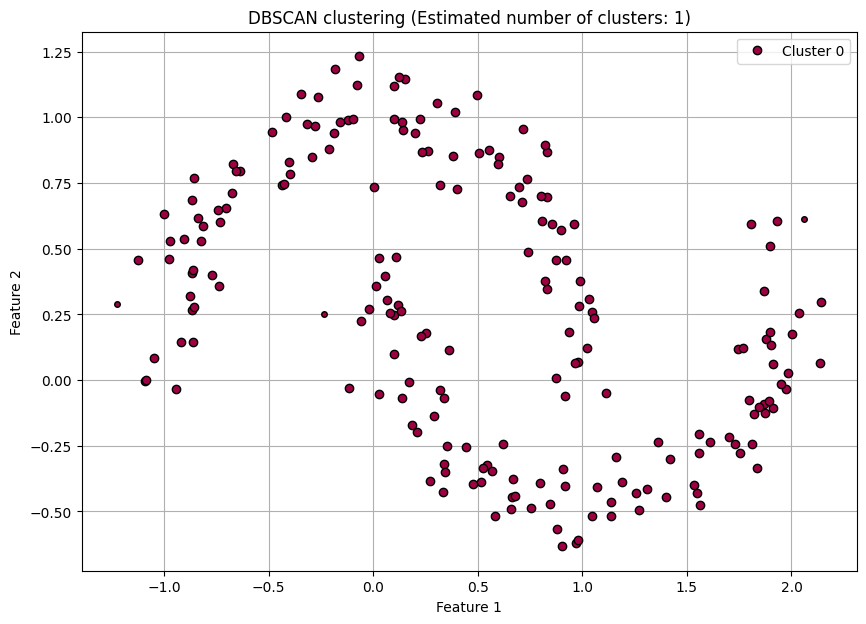

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Apply DBSCAN
# We'll use parameters that are likely to work for this dataset shape.
# eps defines the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point.
dbsc = DBSCAN(eps=0.3, min_samples=5)
dbsc.fit(X)

# Get cluster labels
labels = dbsc.labels_

# Identify core points, border points, and noise points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# 3. Visualize the results and highlight outliers
plt.figure(figsize=(10, 7))

# Plot the data points for each cluster
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core points
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=f'Cluster {k}' if k != -1 else 'Outliers')

    # Plot non-core points (border points)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title(f'DBSCAN clustering (Estimated number of clusters: {n_clusters_})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
(Include your Python code and output in the code box below.)

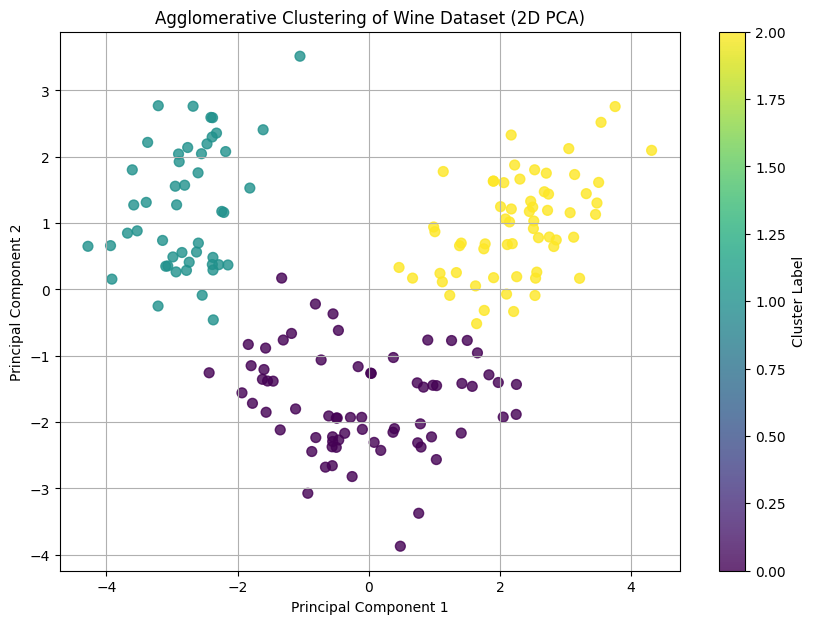

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y_true = wine.target # True labels for comparison/color coding, if needed

# 2. Apply StandardScaler (important for PCA and distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
# For demonstration, let's assume we want 3 clusters (as there are 3 classes in Wine dataset)
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
labels = agglomerative_clustering.fit_predict(X_pca)

# 5. Visualize the result in 2D with a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Agglomerative Clustering of Wine Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

### Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

(Include your Python code and output in the code box below.)


# Task
Create a text cell that outlines the data science workflow for customer segmentation, including choices of clustering algorithms and justifications, data preprocessing steps (missing values, scaling, encoding), methods for determining the optimal number of clusters (Elbow Method, Silhouette Score), and the anticipated benefits for the marketing team.

## Describe Customer Segmentation Workflow

### Subtask:
Create a text cell providing a detailed description of the data science workflow for customer segmentation, covering: clustering algorithms and justifications, data preprocessing steps (missing values, scaling, encoding), methods for determining the number of clusters, and how the marketing team would benefit from the clustering analysis.


## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The

## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.

## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.

## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.

## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.

## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.


## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.

## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.


## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.

## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.


## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.

## Describe Customer Segmentation Workflow

### Clustering Algorithm Choices and Justifications
For customer segmentation based on purchasing behavior and demographics, several clustering algorithms can be considered, each with its strengths:

*   **K-Means Clustering:** This is often the first choice due to its simplicity, efficiency, and interpretability. It's well-suited when we expect customers to fall into a predefined number of distinct, relatively spherical groups. Given that the marketing team might have an idea of needing a few core segments (e.g., 'high-value', 'frequent shopper', 'new customer'), K-Means is a strong candidate. Its efficiency makes it practical for large customer databases.

*   **Hierarchical Clustering (Agglomerative):** This algorithm is useful when the number of clusters is not known beforehand or when a hierarchical structure among customer segments is desired. A dendrogram allows for visual exploration of different levels of granularity in segmentation. It can reveal natural groupings without forcing a specific number of clusters, which can be valuable for uncovering unexpected customer types.

*   **DBSCAN:** While less common for general customer segmentation where distinct groups are expected, DBSCAN can be very effective if the customer segments are of varying densities and shapes, or if identifying outliers (e.g., fraudulent customers, highly unusual purchasing patterns) is a key objective. It does not require specifying the number of clusters, making it flexible for complex, non-spherical clusters.

**Justification for Choice:** For an initial approach, **K-Means** would likely be the primary algorithm. It provides clear, actionable segments that are easy for marketing to understand and target. If, after initial K-Means analysis, the segments appear overlapping or the number of clusters is hard to determine, **Hierarchical Clustering** could be used to explore the natural groupings and inform the optimal 'k' for K-Means or to provide a more nuanced segmentation. DBSCAN would be a consideration for identifying niche, dense groups or anomalies, especially in highly dimensional purchase data.

### Data Preprocessing Steps
Robust data preprocessing is critical for the success of clustering algorithms:

1.  **Handling Missing Values:**
    *   **Identification:** First, identify columns with missing data. The approach depends on the amount and nature of missingness.
    *   **Imputation:** For numerical features (e.g., 'average transaction value', 'frequency of purchase'), missing values can be imputed using the mean, median, or mode of the column. For more sophisticated imputation, K-Nearest Neighbors (KNN) or regression-based methods can be used.
    *   **Removal:** If a column has a very high percentage of missing values or if the number of rows with missing values is small compared to the dataset size, dropping those rows or columns might be considered, though this should be done cautiously to avoid losing valuable information.

2.  **Feature Scaling:**
    *   Clustering algorithms like K-Means, Hierarchical Clustering, and DBSCAN are distance-based. Features with larger numerical ranges will disproportionately influence distance calculations.
    *   **Standardization (StandardScaler):** Transforms features to have a mean of 0 and a standard deviation of 1. This is generally preferred when features have different scales and the distribution is approximately Gaussian or when there are outliers. It's robust to outliers compared to Min-Max scaling for some algorithms.
    *   **Normalization (MinMaxScaler):** Scales features to a fixed range, typically 0 to 1. Useful when specific ranges are required or when the data is not normally distributed and outliers are not a major concern.
    *   For customer purchasing data (e.g., 'total spend', 'number of items'), scaling is essential to ensure all features contribute equally to the distance metric.

3.  **Encoding Categorical Variables:**
    *   Categorical features (e.g., 'preferred product category', 'region', 'gender') cannot be directly used by most clustering algorithms.
    *   **One-Hot Encoding:** Converts each category into a new binary feature (0 or 1). This is suitable for nominal categorical variables where there is no inherent order. For example, 'Region A', 'Region B', 'Region C' would become three new columns.
    *   **Label Encoding:** Assigns a unique integer to each category. This is generally not recommended for nominal variables in clustering as it introduces an artificial ordinal relationship which can mislead distance calculations. It's more appropriate for ordinal variables (e.g., 'customer loyalty level: bronze, silver, gold').

### Determining the Optimal Number of Clusters
Finding the right number of clusters is crucial for meaningful segmentation:

1.  **Elbow Method (for K-Means):**
    *   Involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).
    *   WCSS measures the sum of squared distances between each point and its cluster centroid. As 'k' increases, WCSS generally decreases.
    *   The "elbow point" on the plot, where the rate of decrease in WCSS significantly slows down, suggests a good balance between the number of clusters and the compactness of the clusters.

2.  **Silhouette Score:**
    *   Provides a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to +1.
    *   A high value (close to +1) indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
    *   The average Silhouette Score over different 'k' values can help identify the 'k' that results in well-defined and separated clusters. A higher average score indicates better clustering.

3.  **Domain Knowledge and Business Objectives:**
    *   Ultimately, the "optimal" number of clusters is also heavily influenced by the marketing team's needs and how they plan to utilize the segments. Sometimes, a slightly suboptimal statistical 'k' might be preferred if it aligns better with actionable business strategies (e.g., marketing budget allocation, campaign design).

### Benefits for the Marketing Team
Clustering analysis provides invaluable insights that can significantly enhance the marketing team's strategies and operations:

1.  **Targeted Promotions and Personalization:**
    *   By understanding distinct customer segments (e.g., 'high-value spenders', 'budget shoppers', 'new registrants'), the marketing team can tailor promotional offers, product recommendations, and communication channels. This leads to higher conversion rates and improved customer satisfaction.
    *   For instance, high-value segments might receive exclusive previews or loyalty rewards, while new customers might get introductory discounts.

2.  **Improved Customer Retention:**
    *   Identifying segments at risk of churning (e.g., those with decreasing purchase frequency or engagement) allows the marketing team to proactively implement retention campaigns with personalized incentives or re-engagement strategies.
    *   Conversely, highly loyal customers can be nurtured with specific programs to reinforce their loyalty.

3.  **Product Development and Inventory Management:**
    *   Understanding which product categories are popular among specific segments can inform new product development, optimize inventory levels, and guide merchandising decisions.
    *   For example, if one segment heavily buys eco-friendly products, the company can expand that product line.

4.  **Optimized Resource Allocation:**
    *   Marketing budgets can be allocated more efficiently by focusing resources on segments that promise the highest return on investment (ROI) or require specific attention.
    *   Advertising channels can be chosen based on the preferences and demographics of the target segments.

5.  **Better Understanding of Customer Behavior:**
    *   The segments reveal underlying patterns and characteristics of the customer base that might not be obvious otherwise. This deepens the marketing team's understanding of their audience, leading to more informed strategic planning and better forecasting.

## Generate Synthetic Customer Data

### Subtask:
Generate synthetic customer data using make_blobs to simulate purchasing behavior and demographics for demonstration purposes.


**Reasoning**:
The user wants to generate synthetic customer data. I will use `make_blobs` with the specified parameters to create the data and then display the first few rows.



In [5]:
from sklearn.datasets import make_blobs
import pandas as pd

# 1. Generate synthetic data using make_blobs
X_customer, y_customer = make_blobs(n_samples=500, n_features=5, centers=4, random_state=42)

# Convert to DataFrame for easier inspection and to mimic real-world tabular data
X_customer_df = pd.DataFrame(X_customer, columns=[f'feature_{i+1}' for i in range(X_customer.shape[1])])

# 2. Display the first 5 rows of X_customer
print("First 5 rows of generated synthetic customer data (X_customer):")
print(X_customer_df.head())

First 5 rows of generated synthetic customer data (X_customer):
   feature_1  feature_2  feature_3  feature_4  feature_5
0  -9.728652  -7.689562   5.583809   1.659859   3.041782
1  -9.708691   7.225527   7.496274  -6.288546  -6.454034
2  -8.669234   9.107922   6.916245  -5.431520  -7.031591
3  -7.816059  11.059456   6.191757  -6.355430  -5.894726
4  -3.348415   8.705074   4.971142   2.948715  -7.358801


## Preprocess Data (Scaling)

### Subtask:
Apply StandardScaler to the synthetic customer data. This step is crucial for distance-based clustering algorithms to ensure all features contribute equally to the distance calculations.


**Reasoning**:
The subtask requires applying StandardScaler to the synthetic customer data. I will import StandardScaler, instantiate it, and then use fit_transform on the X_customer_df DataFrame to scale the data, storing it in X_customer_scaled.



In [6]:
from sklearn.preprocessing import StandardScaler

# 1. Instantiate a StandardScaler object
scaler = StandardScaler()

# 2. Apply fit_transform to the X_customer_df DataFrame
X_customer_scaled = scaler.fit_transform(X_customer_df)

print("Shape of scaled customer data (X_customer_scaled):")
print(X_customer_scaled.shape)
print("First 5 rows of scaled customer data:")
print(X_customer_scaled[:5])

Shape of scaled customer data (X_customer_scaled):
(500, 5)
First 5 rows of scaled customer data:
[[-1.24832456 -1.13717383  0.27796768  0.7029521   1.37416635]
 [-1.24100285  0.72080425  0.94474905 -1.67214737 -0.69503768]
 [-0.85972776  0.95529488  0.74252172 -1.4160555  -0.82089139]
 [-0.54678146  1.19839814  0.48992866 -1.69213325 -0.57316069]
 [ 1.09195884  0.90511186  0.06436128  1.08808094 -0.89219278]]


## Determine Optimal Number of Clusters

### Subtask:
Implement the Elbow Method to help determine a suitable number of clusters (k) for the K-Means algorithm. This involves running K-Means for a range of k values and plotting the Within-Cluster Sum of Squares (WCSS).


**Reasoning**:
The subtask requires implementing the Elbow Method. This involves iterating through a range of 'k' values for KMeans, calculating the Within-Cluster Sum of Squares (WCSS) for each, and then plotting these values to find the 'elbow point'. The code block will perform these steps as outlined in the instructions.



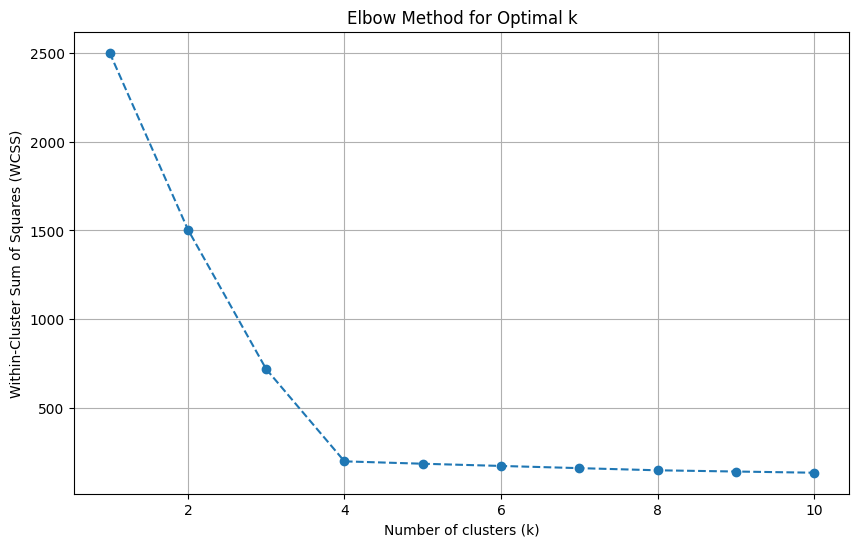

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Initialize an empty list to store WCSS values
wcss = []

# 2. Loop through a range of k values (e.g., 1 to 10)
for i in range(1, 11):
    # 3. Instantiate KMeans with current k
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    # 4. Fit the model to the scaled customer data
    kmeans.fit(X_customer_scaled)
    # 5. Append the WCSS (inertia_) to the list
    wcss.append(kmeans.inertia_)

# 6. Create a line plot for the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


The Elbow Method plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters. To find the optimal 'k', we look for the 'elbow point' – the point where the rate of decrease in WCSS significantly slows down.

From the generated plot, there appears to be a clear 'elbow' at **k = 4**. This indicates that adding more than 4 clusters does not significantly reduce the WCSS, suggesting that 4 is a suitable number of clusters for this synthetic customer dataset.

## Apply K-Means Clustering

### Subtask:
Apply the K-Means clustering algorithm to the scaled synthetic data using the optimal number of clusters determined in the previous step.


**Reasoning**:
Apply K-Means clustering to the scaled synthetic data using the determined optimal number of clusters, and store the resulting cluster labels.



In [8]:
from sklearn.cluster import KMeans

# 1. Instantiate a KMeans object with n_clusters=4 (based on Elbow Method) and random_state=42
kmeans_customer = KMeans(n_clusters=4, random_state=42, n_init=10)

# 2. Fit the KMeans model to the X_customer_scaled data
kmeans_customer.fit(X_customer_scaled)

# 3. Obtain the cluster labels for each data point
customer_cluster_labels = kmeans_customer.labels_

print("K-Means clustering applied successfully.")
print(f"First 10 cluster labels: {customer_cluster_labels[:10]}")
print(f"Number of unique clusters found: {len(set(customer_cluster_labels))}")

K-Means clustering applied successfully.
First 10 cluster labels: [1 3 3 3 0 3 2 1 3 2]
Number of unique clusters found: 4


## Visualize Clustering Results

### Subtask:
Visualize the clustering results using a scatter plot, coloring the data points by their assigned cluster. This will help illustrate the customer segments.


**Reasoning**:
To visualize the clustering results, I will create a scatter plot of the two most significant features from the scaled customer data, coloring each point according to its assigned K-Means cluster. This will visually represent the customer segments.



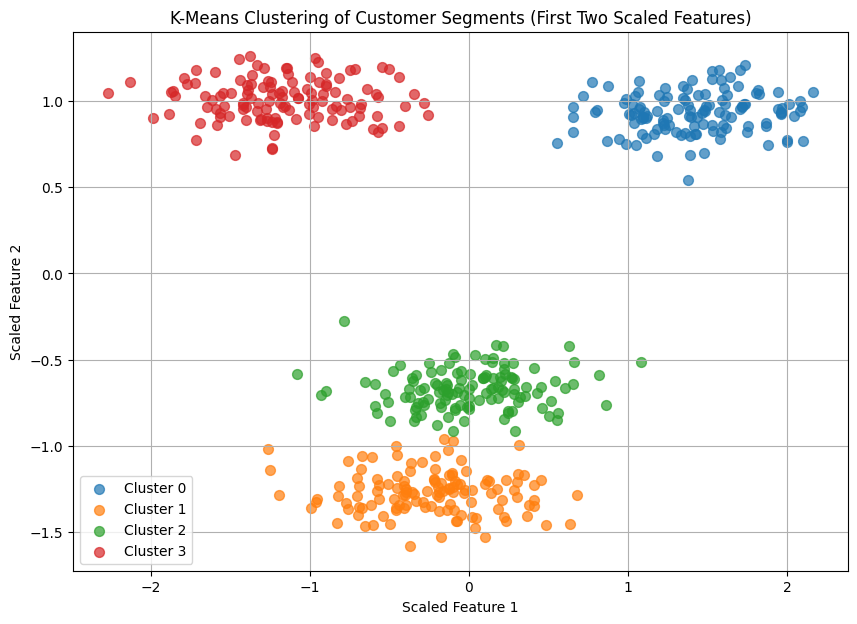

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_customer_scaled and customer_cluster_labels are already defined from previous steps
# If X_customer_scaled has more than 2 features, we'll plot the first two for visualization purposes.
# In a real scenario, PCA or other dimensionality reduction techniques would be used if necessary.

plt.figure(figsize=(10, 7))

# Get unique cluster labels
unique_labels = np.unique(customer_cluster_labels)

# Plot each cluster separately to create a legend
for label in unique_labels:
    # Select data points belonging to the current cluster
    cluster_points = X_customer_scaled[customer_cluster_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=50, alpha=0.7)

plt.title('K-Means Clustering of Customer Segments (First Two Scaled Features)')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.grid(True)
plt.show()